## Filter feature selection

### GenericUnivariateSelect

## X Shape is  (2437, 19
## 90%
## ‘Sex', 'Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'TCa', 'GPT','GOT', 'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH'

In [1]:
#Import Libraries
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import chi2 , f_classif 
#----------------------------------------------------

In [2]:
#load breast cancer data

BC = pd.read_csv('bc_with_mis_90.csv')


In [3]:
BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.400000,1.0,2.0,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,4.461508,9.6,3.0,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.500000,9.3,11.0,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.200000,8.5,13.0,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.000000,8.0,7.0,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.900000,9.5,63.0,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.200000,8.8,82.0,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.400000,8.1,22.0,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.900000,8.2,51.0,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [4]:
BC.isnull().sum()

Sex          0
Age          0
Adress       0
FBS          0
Urea         0
Creatinin    0
ALB          0
TCa          0
GPT          0
GOT          0
ALP          0
CA15         0
CEA          0
WBC          0
RBC          0
HGB          0
PLT          0
ESR          0
LDH          0
Na           0
K            0
CL           0
CLASS        0
dtype: int64

## outlires by Z-score

In [5]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())


In [6]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_TCa_outlier_Z = BC[(BC.ZScore_TCa>3) | (BC.ZScore_TCa<-3)]
BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]



In [7]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan

BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan


In [8]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()


Sex           0
Age           0
Adress        0
FBS          50
Urea         66
Creatinin    27
ALB          60
TCa           8
GPT          61
GOT          43
ALP          28
CA15          3
CEA           1
WBC          13
RBC           4
HGB           3
PLT           3
ESR          30
LDH          12
Na            1
K             8
CL            3
CLASS         0
dtype: int64

In [9]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [10]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])


In [11]:
y = BC.CLASS                          # M or B 
list = ['CLASS']
x = BC.drop(list,axis = 1 )
x.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,1,60,24,200.00000,23.0,0.8,3.400000,1.0,2.0,1.0,124.000000,69.12,8.02,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1
1,1,53,19,154.36173,22.0,0.7,4.461508,9.6,3.0,7.0,133.000000,51.82,7.91,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1
2,1,50,19,154.36173,27.0,0.6,3.500000,9.3,11.0,17.0,155.000000,50.00,8.74,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4
3,1,36,17,300.00000,15.0,1.1,4.200000,8.5,13.0,1.0,140.701195,40.11,10.34,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1
4,1,30,17,345.00000,2.0,1.0,3.000000,8.0,7.0,13.0,125.000000,67.63,7.31,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1


## Feature Selection by Generic


In [12]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=2) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)


In [13]:
#showing X Dimension 
print('X Shape is ' , X.shape)



X Shape is  (2437, 2)


In [14]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]



Selected Features are :  [False False False False False False False False False False False  True
 False False False False  True False False False False False]


Index(['CA15', 'PLT'], dtype='object')

In [15]:
X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","CEA","WBC","RBC","ESR","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [16]:
X.shape


(2437, 2)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [18]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [19]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [20]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.7

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.29918032786885246
mean_squared_error is = 0.54593213346841


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 0.9939792008757526
Decision Tree classifier Testing Accurcy =  0.7
[[242  97]
 [ 86 185]]


Text(33.0, 0.5, 'Acutl')

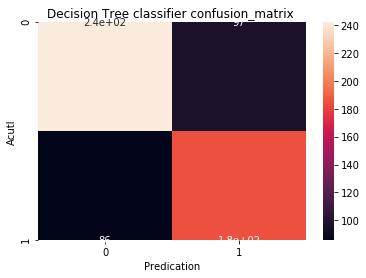

In [22]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")



In [23]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       339
           1       0.66      0.68      0.67       271

    accuracy                           0.70       610
   macro avg       0.70      0.70      0.70       610
weighted avg       0.70      0.70      0.70       610

accuracy_score= 0.7016393442622951


## Feature Selection by Generic BY 3FS

In [24]:



#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=3) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)


In [25]:
#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 3)


In [26]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]



Selected Features are :  [False False False False False False False False False False False  True
 False False False False  True False  True False False False]


Index(['CA15', 'PLT', 'LDH'], dtype='object')

In [27]:
X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","CEA","WBC","RBC","ESR","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [29]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [30]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [31]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.7704918032786885

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.22950819672131148
mean_squared_error is = 0.47907013758040845


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 0.9994526546250684
Decision Tree classifier Testing Accurcy =  0.7704918032786885
[[284  69]
 [ 71 186]]


Text(33.0, 0.5, 'Acutl')

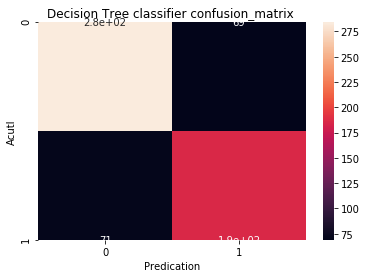

In [33]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [34]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       353
           1       0.73      0.72      0.73       257

    accuracy                           0.77       610
   macro avg       0.76      0.76      0.76       610
weighted avg       0.77      0.77      0.77       610

accuracy_score= 0.7704918032786885


## Feature Selection by Generic BY 4FS

In [35]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=4) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 4)


In [36]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False  True False False False False False False False  True
 False False False False  True False  True False False False]


Index(['FBS', 'CA15', 'PLT', 'LDH'], dtype='object')

In [37]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","CEA","WBC","RBC","ESR","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [39]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [40]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [41]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8016393442622951

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.19836065573770492
mean_squared_error is = 0.44537698159840383


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8016393442622951
[[273  60]
 [ 61 216]]


Text(33.0, 0.5, 'Acutl')

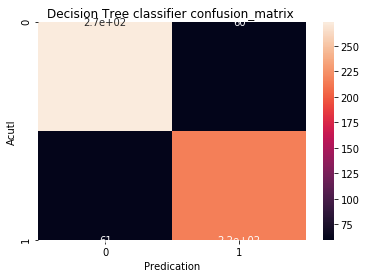

In [43]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")



In [44]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       333
           1       0.78      0.78      0.78       277

    accuracy                           0.80       610
   macro avg       0.80      0.80      0.80       610
weighted avg       0.80      0.80      0.80       610

accuracy_score= 0.8016393442622951


## Feature Selection by Generic BY 5FS

In [45]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=5) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)


#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 5)


In [46]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False  True False False False False False False False  True
 False False False False  True  True  True False False False]


Index(['FBS', 'CA15', 'PLT', 'ESR', 'LDH'], dtype='object')

In [47]:

X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","CEA","WBC","RBC","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



In [48]:
 X.shape

(2437, 5)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [50]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [51]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [52]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8229508196721311

In [53]:


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.17704918032786884
mean_squared_error is = 0.420772123990966


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8229508196721311
[[280  59]
 [ 49 222]]


Text(33.0, 0.5, 'Acutl')

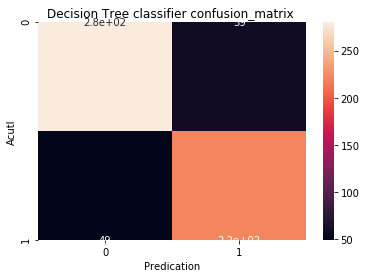

In [54]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [55]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       339
           1       0.79      0.82      0.80       271

    accuracy                           0.82       610
   macro avg       0.82      0.82      0.82       610
weighted avg       0.82      0.82      0.82       610

accuracy_score= 0.8229508196721311


## Feature Selection by Generic BY 6FS

In [56]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=6) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)


In [57]:
#showing X Dimension 
print('X Shape is ' , X.shape)



X Shape is  (2437, 6)


In [58]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False  True False False False False False False False  True
  True False False False  True  True  True False False False]


Index(['FBS', 'CA15', 'CEA', 'PLT', 'ESR', 'LDH'], dtype='object')

In [59]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","WBC","RBC","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



In [60]:
X.shape

(2437, 6)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [62]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [63]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [64]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8114754098360656

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.1885245901639344
mean_squared_error is = 0.4341941848573452


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8114754098360656
[[270  58]
 [ 57 225]]


Text(33.0, 0.5, 'Acutl')

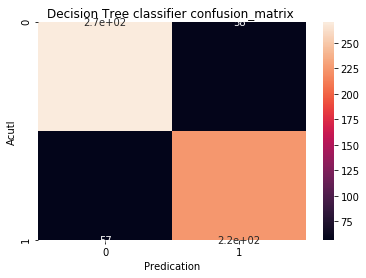

In [66]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [67]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       328
           1       0.80      0.80      0.80       282

    accuracy                           0.81       610
   macro avg       0.81      0.81      0.81       610
weighted avg       0.81      0.81      0.81       610

accuracy_score= 0.8114754098360656


## Feature Selection by Generic BY 7FS

In [68]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=7) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)



In [69]:
#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 7)


In [70]:
#showing X Dimension 
#print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]


Selected Features are :  [False False False  True False False False False False False False  True
  True False  True False  True  True  True False False False]


Index(['FBS', 'CA15', 'CEA', 'RBC', 'PLT', 'ESR', 'LDH'], dtype='object')

In [71]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","WBC","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



X.shape


(2437, 7)

In [72]:



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [73]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [74]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)



In [75]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8327868852459016

In [76]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.16721311475409836
mean_squared_error is = 0.4089170022805341


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8327868852459016
[[299  60]
 [ 42 209]]


Text(33.0, 0.5, 'Acutl')

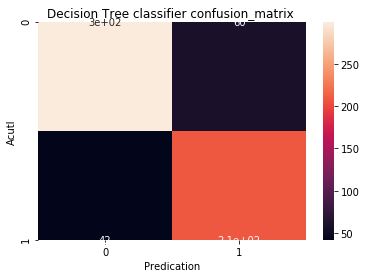

In [77]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [78]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       359
           1       0.78      0.83      0.80       251

    accuracy                           0.83       610
   macro avg       0.83      0.83      0.83       610
weighted avg       0.84      0.83      0.83       610

accuracy_score= 0.8327868852459016


## Feature Selection by Generic BY 8FS

In [79]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=8) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)



#showing X Dimension 
print('X Shape is ' , X.shape)



X Shape is  (2437, 8)


In [80]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]



X Shape is  (2437, 8)
Selected Features are :  [False False False  True False False False False False False False  True
  True  True  True False  True  True  True False False False]


Index(['FBS', 'CA15', 'CEA', 'WBC', 'RBC', 'PLT', 'ESR', 'LDH'], dtype='object')

In [81]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



X.shape



(2437, 8)

In [82]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [83]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [84]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [85]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8377049180327869

In [86]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.16229508196721312
mean_squared_error is = 0.40285863769716185


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8377049180327869
[[291  59]
 [ 40 220]]


Text(33.0, 0.5, 'Acutl')

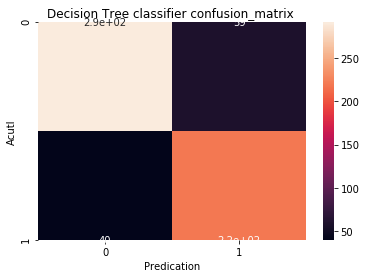

In [87]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")




In [88]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       350
           1       0.79      0.85      0.82       260

    accuracy                           0.84       610
   macro avg       0.83      0.84      0.84       610
weighted avg       0.84      0.84      0.84       610

accuracy_score= 0.8377049180327869


## Feature Selection by Generic BY 9FS

In [89]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=9) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)



#showing X Dimension 
print('X Shape is ' , X.shape)



X Shape is  (2437, 9)


In [90]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]




X Shape is  (2437, 9)
Selected Features are :  [False False False  True False False False False False False  True  True
  True  True  True False  True  True  True False False False]


Index(['FBS', 'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'PLT', 'ESR', 'LDH'], dtype='object')

In [91]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



X.shape


(2437, 9)

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [93]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [94]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [95]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8278688524590164

In [96]:


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.1721311475409836
mean_squared_error is = 0.4148869093391398


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8278688524590164
[[278  59]
 [ 46 227]]


Text(33.0, 0.5, 'Acutl')

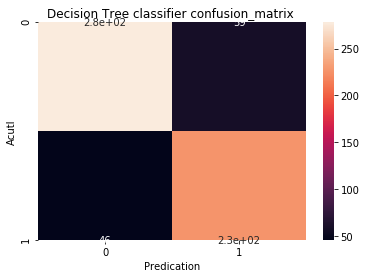

In [97]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [98]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       337
           1       0.79      0.83      0.81       273

    accuracy                           0.83       610
   macro avg       0.83      0.83      0.83       610
weighted avg       0.83      0.83      0.83       610

accuracy_score= 0.8278688524590164


## Feature Selection by Generic BY 10FS

In [99]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=10) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)



#showing X Dimension 
print('X Shape is ' , X.shape)



X Shape is  (2437, 10)


In [100]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]


X Shape is  (2437, 10)
Selected Features are :  [False False False  True False False False False  True False  True  True
  True  True  True False  True  True  True False False False]


Index(['FBS', 'GPT', 'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'PLT', 'ESR', 'LDH'], dtype='object')

In [101]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","GOT","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



X.shape


(2437, 10)

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [103]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [104]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [105]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)




0.8540983606557377

In [106]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.14590163934426228
mean_squared_error is = 0.3819707310046966


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8540983606557377
[[305  41]
 [ 48 216]]


Text(33.0, 0.5, 'Acutl')

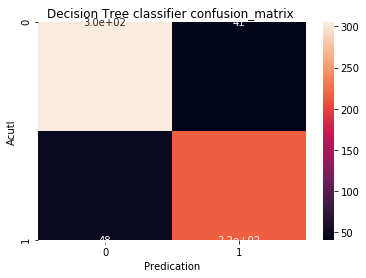

In [107]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [108]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       346
           1       0.84      0.82      0.83       264

    accuracy                           0.85       610
   macro avg       0.85      0.85      0.85       610
weighted avg       0.85      0.85      0.85       610

accuracy_score= 0.8540983606557377


## Feature Selection by Generic BY 11FS

In [109]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=11) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)



#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 11)


In [110]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]


X Shape is  (2437, 11)
Selected Features are :  [False False False  True False False False False  True  True  True  True
  True  True  True False  True  True  True False False False]


Index(['FBS', 'GPT', 'GOT', 'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'PLT', 'ESR',
       'LDH'],
      dtype='object')

In [111]:
X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



X.shape


(2437, 11)

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [113]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [114]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [115]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8459016393442623

In [116]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.1540983606557377
mean_squared_error is = 0.3925536404820846


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8459016393442623
[[278  61]
 [ 33 238]]


Text(33.0, 0.5, 'Acutl')

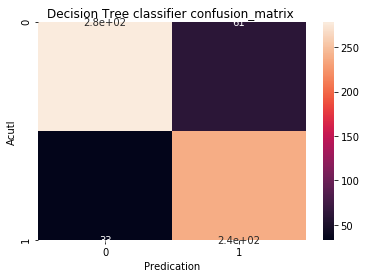

In [117]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [118]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       339
           1       0.80      0.88      0.84       271

    accuracy                           0.85       610
   macro avg       0.84      0.85      0.85       610
weighted avg       0.85      0.85      0.85       610

accuracy_score= 0.8459016393442623


## Feature Selection by Generic BY 12FS


In [119]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=12) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 12)


In [120]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]



X Shape is  (2437, 12)
Selected Features are :  [False False False  True  True False False False  True  True  True  True
  True  True  True False  True  True  True False False False]


Index(['FBS', 'Urea', 'GPT', 'GOT', 'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'PLT',
       'ESR', 'LDH'],
      dtype='object')

In [121]:
X=BC.drop(["CLASS","Sex","Age","Adress","Creatinin","ALB","TCa","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



X.shape


(2437, 12)

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [123]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [124]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [125]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8229508196721311

In [126]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.17704918032786884
mean_squared_error is = 0.420772123990966


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8229508196721311
[[290  49]
 [ 59 212]]


Text(33.0, 0.5, 'Acutl')

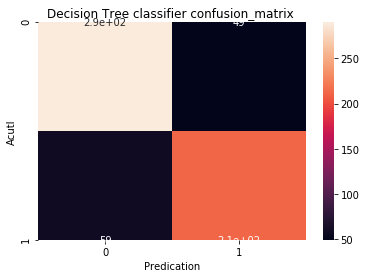

In [127]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")



In [128]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       339
           1       0.81      0.78      0.80       271

    accuracy                           0.82       610
   macro avg       0.82      0.82      0.82       610
weighted avg       0.82      0.82      0.82       610

accuracy_score= 0.8229508196721311


## Feature Selection by Generic BY 13FS


In [129]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=13) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 13)


In [130]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]


X Shape is  (2437, 13)
Selected Features are :  [False False  True  True  True False False False  True  True  True  True
  True  True  True False  True  True  True False False False]


Index(['Adress', 'FBS', 'Urea', 'GPT', 'GOT', 'ALP', 'CA15', 'CEA', 'WBC',
       'RBC', 'PLT', 'ESR', 'LDH'],
      dtype='object')

In [131]:
X=BC.drop(["CLASS","Sex","Age","Creatinin","ALB","TCa","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



X.shape


(2437, 13)

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [133]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [134]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [135]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8278688524590164

In [136]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.1721311475409836
mean_squared_error is = 0.4148869093391398


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8278688524590164
[[292  51]
 [ 54 213]]


Text(33.0, 0.5, 'Acutl')

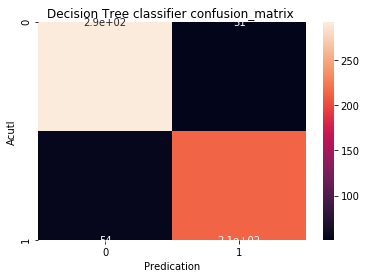

In [137]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [138]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       343
           1       0.81      0.80      0.80       267

    accuracy                           0.83       610
   macro avg       0.83      0.82      0.82       610
weighted avg       0.83      0.83      0.83       610

accuracy_score= 0.8278688524590164


## Feature Selection by Generic BY 14FS


In [139]:

#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=14) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 14)


In [140]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]



X Shape is  (2437, 14)
Selected Features are :  [False  True  True  True  True False False False  True  True  True  True
  True  True  True False  True  True  True False False False]


Index(['Age', 'Adress', 'FBS', 'Urea', 'GPT', 'GOT', 'ALP', 'CA15', 'CEA',
       'WBC', 'RBC', 'PLT', 'ESR', 'LDH'],
      dtype='object')

In [141]:
X=BC.drop(["CLASS","Sex","Creatinin","ALB","TCa","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



X.shape


(2437, 14)

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [143]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [144]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [145]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8491803278688524

In [146]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.15081967213114755
mean_squared_error is = 0.38835508511045347


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8491803278688524
[[288  50]
 [ 42 230]]


Text(33.0, 0.5, 'Acutl')

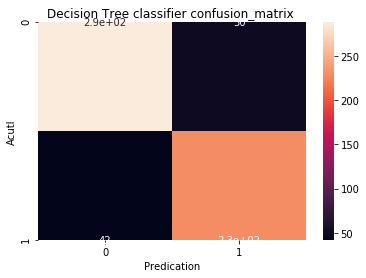

In [147]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [148]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       338
           1       0.82      0.85      0.83       272

    accuracy                           0.85       610
   macro avg       0.85      0.85      0.85       610
weighted avg       0.85      0.85      0.85       610

accuracy_score= 0.8491803278688524



## Feature Selection by Generic BY 15FS


In [149]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=15) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)



X Shape is  (2437, 15)


In [150]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]



X Shape is  (2437, 15)
Selected Features are :  [False  True  True  True  True False  True False  True  True  True  True
  True  True  True False  True  True  True False False False]


Index(['Age', 'Adress', 'FBS', 'Urea', 'ALB', 'GPT', 'GOT', 'ALP', 'CA15',
       'CEA', 'WBC', 'RBC', 'PLT', 'ESR', 'LDH'],
      dtype='object')

In [151]:
X=BC.drop(["CLASS","Sex","Creatinin","TCa","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 



X.shape


(2437, 15)

In [152]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [153]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [154]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [155]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8622950819672132

In [156]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.1377049180327869
mean_squared_error is = 0.3710861329028436


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8622950819672132
[[293  37]
 [ 47 233]]


Text(33.0, 0.5, 'Acutl')

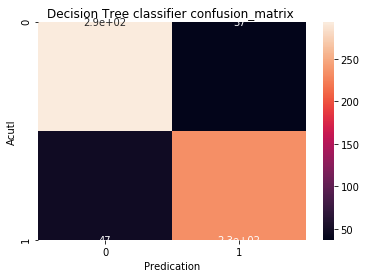

In [157]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [158]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       330
           1       0.86      0.83      0.85       280

    accuracy                           0.86       610
   macro avg       0.86      0.86      0.86       610
weighted avg       0.86      0.86      0.86       610

accuracy_score= 0.8622950819672132


## Feature Selection by Generic BY 16FS


In [159]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=16) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 16)


In [160]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]


X Shape is  (2437, 16)
Selected Features are :  [False  True  True  True  True False  True False  True  True  True  True
  True  True  True  True  True  True  True False False False]


Index(['Age', 'Adress', 'FBS', 'Urea', 'ALB', 'GPT', 'GOT', 'ALP', 'CA15',
       'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH'],
      dtype='object')

In [161]:
X=BC.drop(["CLASS","Sex","Creatinin","TCa","K","Na","CL"],axis=1)
Y=BC["CLASS"] 
X.shape

(2437, 16)

In [162]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [163]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [164]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [165]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8786885245901639

In [166]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.12131147540983607
mean_squared_error is = 0.3482979692875571


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8786885245901639
[[307  34]
 [ 40 229]]


Text(33.0, 0.5, 'Acutl')

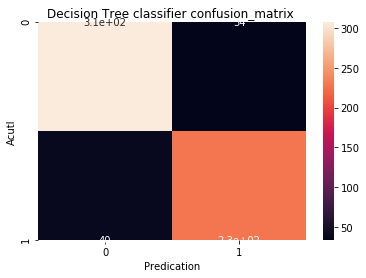

In [167]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [168]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       341
           1       0.87      0.85      0.86       269

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8786885245901639


## Feature Selection by Generic BY 17FS

In [169]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=17) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 17)


In [170]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]


X Shape is  (2437, 17)
Selected Features are :  [False  True  True  True  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True False False]


Index(['Age', 'Adress', 'FBS', 'Urea', 'ALB', 'GPT', 'GOT', 'ALP', 'CA15',
       'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH', 'Na'],
      dtype='object')

In [171]:
X=BC.drop(["CLASS","Sex","Creatinin","TCa","K","CL"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 17)

In [172]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [173]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [174]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [175]:

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8836065573770492

In [176]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)




mean_absolute_error is = 0.11639344262295082
mean_squared_error is = 0.34116483204303283


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8836065573770492
[[292  34]
 [ 37 247]]


Text(33.0, 0.5, 'Acutl')

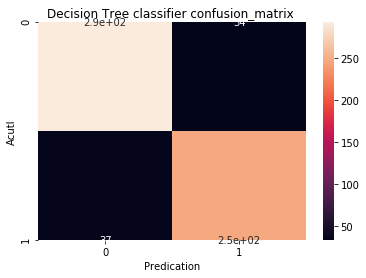

In [177]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [178]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 



classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       326
           1       0.88      0.87      0.87       284

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8836065573770492


   ## Feature Selection by Generic BY 18FS

In [179]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=18) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 18)


In [180]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]


X Shape is  (2437, 18)
Selected Features are :  [False  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False False]


Index(['Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'GPT', 'GOT', 'ALP',
       'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH', 'Na'],
      dtype='object')

In [181]:
X=BC.drop(["CLASS","Sex","TCa","K","CL"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 18)

In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [183]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [184]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [185]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8672131147540983

In [186]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.13278688524590163
mean_squared_error is = 0.3643993485805122


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8672131147540983
[[290  50]
 [ 31 239]]


Text(33.0, 0.5, 'Acutl')

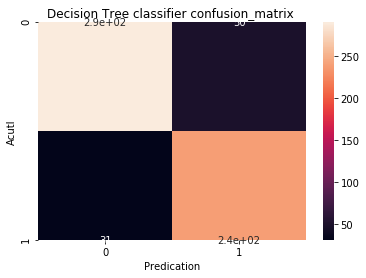

In [187]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [188]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       340
           1       0.83      0.89      0.86       270

    accuracy                           0.87       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8672131147540983


 ## Feature Selection by Generic BY 19FS


In [189]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=19) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 19)


In [190]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]



X Shape is  (2437, 19)
Selected Features are :  [False  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True]


Index(['Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'GPT', 'GOT', 'ALP',
       'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH', 'Na', 'CL'],
      dtype='object')

In [191]:
X=BC.drop(["CLASS","Sex","TCa","K"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 19)

In [192]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [193]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [194]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [195]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8770491803278688

In [196]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.12295081967213115
mean_squared_error is = 0.35064343665913833


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8770491803278688
[[296  43]
 [ 32 239]]


Text(33.0, 0.5, 'Acutl')

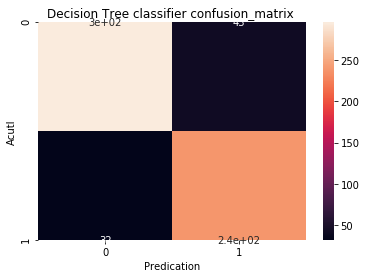

In [197]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [198]:
  

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       339
           1       0.85      0.88      0.86       271

    accuracy                           0.88       610
   macro avg       0.87      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8770491803278688


 ## Feature Selection by Generic BY 20FS

In [199]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=20) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)



X Shape is  (2437, 20)


In [200]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]



X Shape is  (2437, 20)
Selected Features are :  [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True]


Index(['Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'TCa', 'GPT', 'GOT',
       'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH', 'Na',
       'CL'],
      dtype='object')

In [201]:
X=BC.drop(["CLASS","Sex","K"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 20)

In [202]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [203]:
from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [204]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [205]:


from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8737704918032787

In [206]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.12622950819672132
mean_squared_error is = 0.35528792295365363


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8737704918032787
[[300  33]
 [ 44 233]]


Text(33.0, 0.5, 'Acutl')

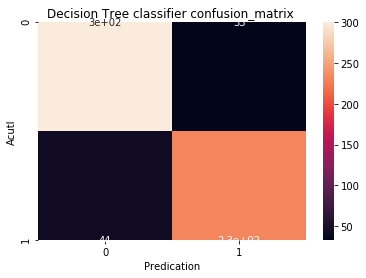

In [207]:



from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")



In [208]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       333
           1       0.88      0.84      0.86       277

    accuracy                           0.87       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8737704918032787


 ## Feature Selection by Generic BY 21FS


In [209]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=21) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)


X Shape is  (2437, 21)


In [210]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]



X Shape is  (2437, 21)
Selected Features are :  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True]


Index(['Sex', 'Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'TCa', 'GPT',
       'GOT', 'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH',
       'Na', 'CL'],
      dtype='object')

In [211]:
X=BC.drop(["CLASS","K"],axis=1)
Y=BC["CLASS"] 
X.shape



(2437, 21)

In [212]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


In [213]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [214]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [215]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)




0.9016393442622951

In [216]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.09836065573770492
mean_squared_error is = 0.31362502409359


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.9016393442622951
[[305  32]
 [ 28 245]]


Text(33.0, 0.5, 'Acutl')

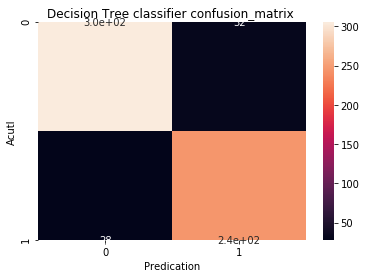

In [217]:

from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [218]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       337
           1       0.88      0.90      0.89       273

    accuracy                           0.90       610
   macro avg       0.90      0.90      0.90       610
weighted avg       0.90      0.90      0.90       610

accuracy_score= 0.9016393442622951


 ## Feature Selection by Generic BY 22FS

In [219]:
#print('Original X Shape is ' , X.shape)
FeatureSelection = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=22) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
X = FeatureSelection.fit_transform(x, y)
#showing X Dimension 
print('X Shape is ' , X.shape)



X Shape is  (2437, 22)


In [220]:
## showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())
x.columns[FeatureSelection.get_support()]




X Shape is  (2437, 22)
Selected Features are :  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


Index(['Sex', 'Age', 'Adress', 'FBS', 'Urea', 'Creatinin', 'ALB', 'TCa', 'GPT',
       'GOT', 'ALP', 'CA15', 'CEA', 'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH',
       'Na', 'K', 'CL'],
      dtype='object')

In [221]:
X=BC.drop(["CLASS"],axis=1)
Y=BC["CLASS"] 
X.shape


(2437, 22)

In [222]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [223]:

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [224]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [225]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8918032786885246

In [226]:


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.10819672131147541
mean_squared_error is = 0.32893270027693416


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8918032786885246
[[304  32]
 [ 34 240]]


Text(33.0, 0.5, 'Acutl')

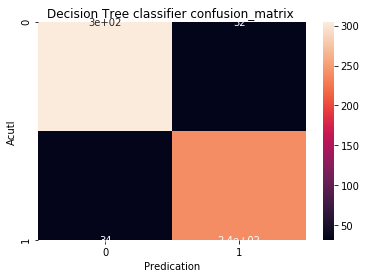

In [227]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [228]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       336
           1       0.88      0.88      0.88       274

    accuracy                           0.89       610
   macro avg       0.89      0.89      0.89       610
weighted avg       0.89      0.89      0.89       610

accuracy_score= 0.8918032786885246


In [231]:
Num_best= [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
validation_accuracy = [70,77,80,82,81,83,83,82,85,84,82,82,84,86,87,88,86,87,87,90,89]
                                   
List = zip(Num_best,validation_accuracy)
df = pd.DataFrame(data = List, columns=['Num_best','validation_accuracy'],)
df


,Num_best,validation_accuracy
0,2,70
1,3,77
2,4,80
3,5,82
4,6,81
5,7,83
6,8,83
7,9,82
8,10,85
9,11,84


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'bst'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


the best fretures number by GenericUnivariateSelect are 21:
Sex, Age, Adress, FBS, Urea, Creatinin, ALB, TCa, GPT, GOT, ALP, CA15, CEA, WBC, RBC, HGB, PLT, ESR, LDH, Na, CL


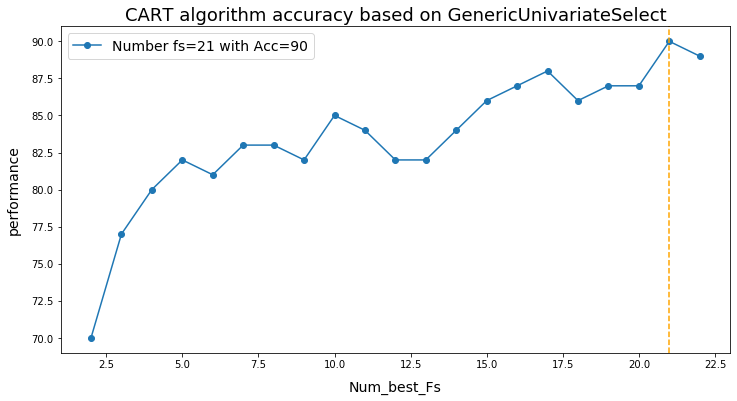

In [235]:
plt.figure(figsize=(12,6))
plt.plot(df['Num_best'],df['validation_accuracy'],label='Number fs=21 with Acc=90',marker='o')

plt.title("CART algorithm accuracy based on GenericUnivariateSelect",fontsize=18)
plt.axvline(x=21, color='orange', linestyle='--')
plt.xlabel('Num_best_Fs',labelpad=10, fontsize=14)
plt.ylabel('performance',labelpad=10, fontsize=14)
plt.legend(loc='bst',fontsize=14)

print("the best fretures number by GenericUnivariateSelect are 21:")
print("Sex, Age, Adress, FBS, Urea, Creatinin, ALB, TCa, GPT, GOT, ALP, CA15, CEA, WBC, RBC, HGB, PLT, ESR, LDH, Na, CL")
plt.show()